In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
df.shape

(962, 2)

In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
df["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

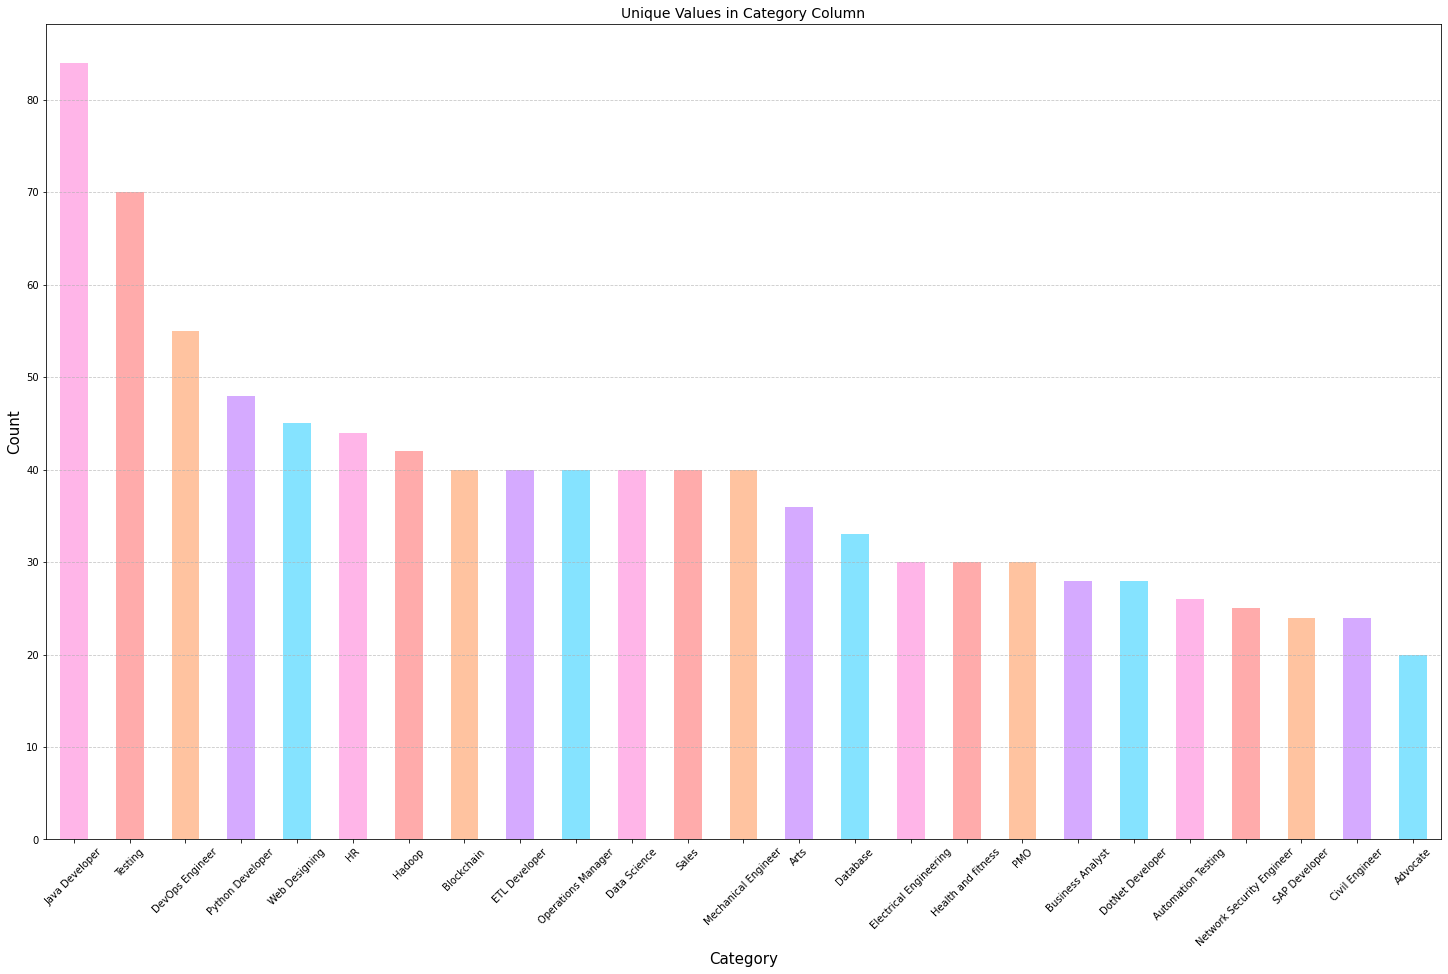

In [8]:
category_counts = df['Category'].value_counts()

# Define pastel colors
pastel_colors = ['#FFB5E8', '#FFABAB', '#FFC3A0', '#D5AAFF', '#85E3FF']

# Plot the counts
plt.figure(figsize=(25, 15))
category_counts.plot(kind='bar', color=pastel_colors[:len(category_counts)])
plt.title('Unique Values in Category Column', fontsize=14)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

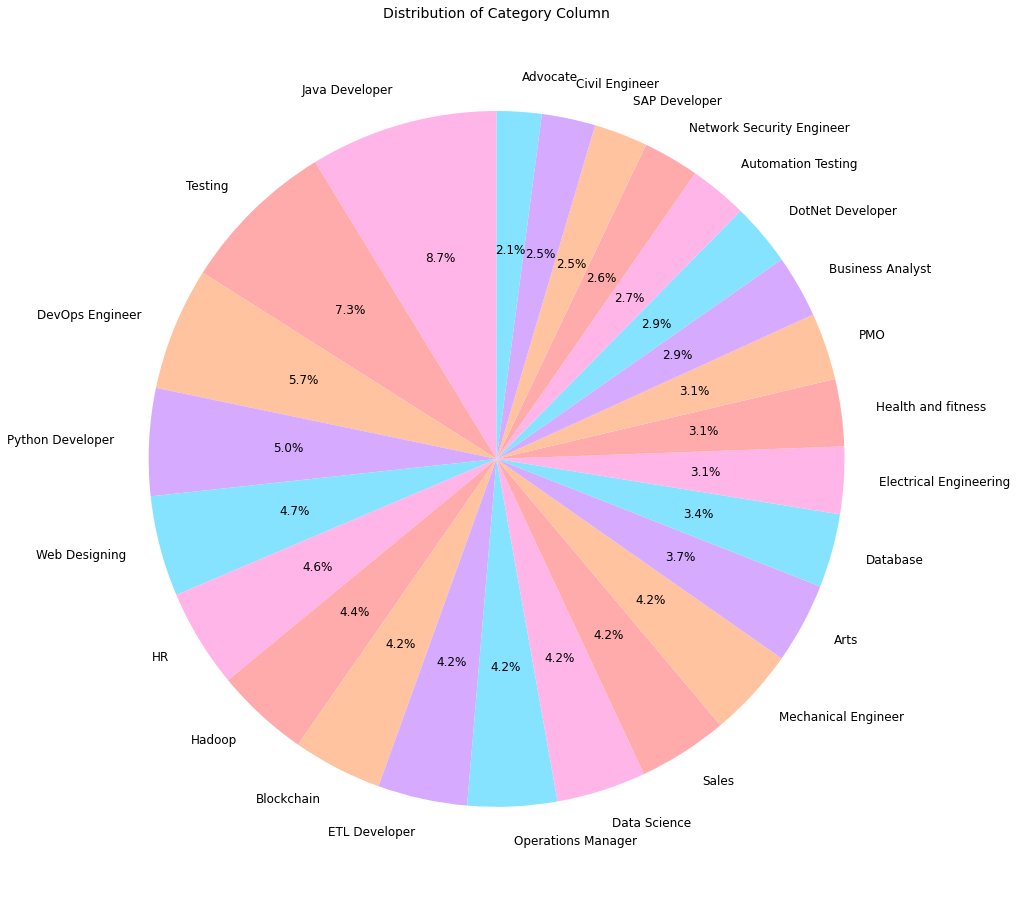

In [9]:
pastel_colors = ['#FFB5E8', '#FFABAB', '#FFC3A0', '#D5AAFF', '#85E3FF']

# Plot pie chart
plt.figure(figsize=(18, 16))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=pastel_colors[:len(category_counts)], 
                     startangle=90, textprops={'fontsize': 12})
plt.title('Distribution of Category Column', fontsize=14)
plt.ylabel('')  # Hide the default ylabel
plt.show()

In [10]:
import re

def clean_text(text):
    # Remove RT and cc
    text = re.sub(r'\bRT\b|cc', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7f]', '', text)
    # Remove punctuations and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Strip leading and trailing whitespace
    text = text.strip()
    return text

df['Resume'] = df['Resume'].apply(lambda x: clean_text(x))


In [11]:

from nltk.corpus import stopwords
import nltk

# Download the stopwords list (only needed once)
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))


# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)  # Join the filtered words back into a string

# Apply the function to the DataFrame
df['Resume'] = df['Resume'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Renuka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 May 2017 UITRGPV Da...
2,Data Science,Areas Interest Deep Learning Control System De...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


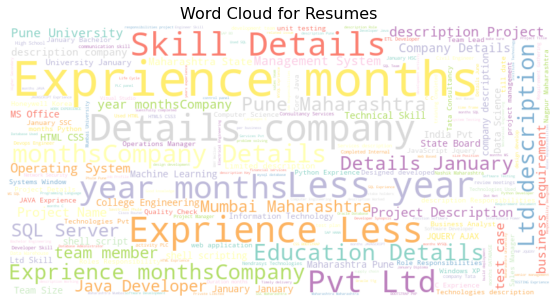

In [13]:

from wordcloud import WordCloud


# Combine all text in the 'Resume' column
text = " ".join(resume for resume in df['Resume'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Set3',
    stopwords=None  # Optionally, you can provide a list of stopwords to exclude.
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Word Cloud for Resumes", fontsize=16)
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(df['Category'])
df['Category'] = label_encoder.transform(df['Category'])

# Mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("\nLabel Mapping:", label_mapping)



Label Mapping: {'Advocate': 0, 'Arts': 1, 'Automation Testing': 2, 'Blockchain': 3, 'Business Analyst': 4, 'Civil Engineer': 5, 'Data Science': 6, 'Database': 7, 'DevOps Engineer': 8, 'DotNet Developer': 9, 'ETL Developer': 10, 'Electrical Engineering': 11, 'HR': 12, 'Hadoop': 13, 'Health and fitness': 14, 'Java Developer': 15, 'Mechanical Engineer': 16, 'Network Security Engineer': 17, 'Operations Manager': 18, 'PMO': 19, 'Python Developer': 20, 'SAP Developer': 21, 'Sales': 22, 'Testing': 23, 'Web Designing': 24}


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

In [16]:
tfidf.fit(df['Resume'])

TfidfVectorizer(stop_words='english')

In [17]:
resume_tfidf=tfidf.transform(df['Resume'])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(resume_tfidf, df['Category'], test_size=0.2, random_state=42)


In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Check the class distribution after resampling
print(f"Original class distribution: {Counter(y_train)}")
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


print(f"Resampled class distribution: {Counter(y_train)}")


Original class distribution: Counter({15: 69, 23: 54, 8: 41, 24: 40, 13: 38, 20: 38, 6: 35, 3: 33, 10: 33, 12: 32, 22: 32, 16: 32, 1: 30, 18: 28, 7: 25, 11: 24, 4: 24, 14: 23, 19: 23, 9: 23, 17: 22, 2: 21, 0: 17, 21: 17, 5: 15})
Resampled class distribution: Counter({2: 69, 3: 69, 18: 69, 14: 69, 1: 69, 12: 69, 13: 69, 22: 69, 11: 69, 23: 69, 15: 69, 19: 69, 6: 69, 0: 69, 8: 69, 9: 69, 16: 69, 4: 69, 20: 69, 7: 69, 5: 69, 21: 69, 10: 69, 17: 69, 24: 69})


In [20]:
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [21]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier


# Define classifiers (including OneVsRest and OneVsOne classifiers)
classifiers = {
    "Logistic Regression (OvR)": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "SVM (OvR)": OneVsRestClassifier(SVC(probability=True)),
    "SVM (OvO)": OneVsOneClassifier(SVC(probability=True)),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}

# Train and evaluate each model
results = []

for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    
    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"Model: {name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    
    # Save results for comparison
    results.append({
        "Model": name,
        "Training Accuracy": train_accuracy,
        "Testing Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

results_df


Training Logistic Regression (OvR)...
Model: Logistic Regression (OvR)
Training Accuracy: 0.9988
Testing Accuracy: 0.9948
Precision: 0.9955
Recall: 0.9948
F1 Score: 0.9949
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  

Model: Decision Tree
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  

Model: Linear Discriminant Analysis
Training Accuracy: 0.6986
Testing Accuracy: 0.6684
Precision: 0.8818
Recall: 0.6684
F1 Score: 0.7276
Confusion Matrix:
[[ 1  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0]
 [ 0  0  0  1  0  5  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  2  0  1  0  0  0  0
   0]
 [ 0  0  0  3  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  1  0  1  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  2  0  0  0  0  0  0  5  0  0  0  

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (OvR),0.998841,0.994819,0.995466,0.994819,0.994895
1,SVM (OvR),1.000000,0.994819,0.995466,0.994819,0.994895
2,SVM (OvO),1.000000,0.994819,0.995142,0.994819,0.994806
3,Random Forest,1.000000,0.994819,0.995466,0.994819,0.994895
4,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
5,Naive Bayes,1.000000,0.994819,0.995394,0.994819,0.994875
6,K-Nearest Neighbors,0.999420,0.994819,0.995855,0.994819,0.995011
7,Gradient Boosting,1.000000,0.994819,0.995682,0.994819,0.994958
8,Linear Discriminant Analysis,0.698551,0.668394,0.881773,0.668394,0.727632


In [23]:
import pickle

# Assuming Gradient Boosting model is trained and stored in the classifiers dictionary
gradient_boosting_model = classifiers['K-Nearest Neighbors']

# Save the model to a .pkl file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(gradient_boosting_model, file)

print("K-Nearest Neighbors model saved as 'knn_model.pkl'")


K-Nearest Neighbors model saved as 'knn_model.pkl'


In [24]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(label_encoder, open("encoder.pkl",'wb'))